# Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Loading the Dataset

In [ ]:
dataset = pd.read_csv('adsorber.csv')
X = dataset.iloc[:1382, 2].values
Y = dataset.iloc[:1382, -1].values

# Plotting the Scattered Curve


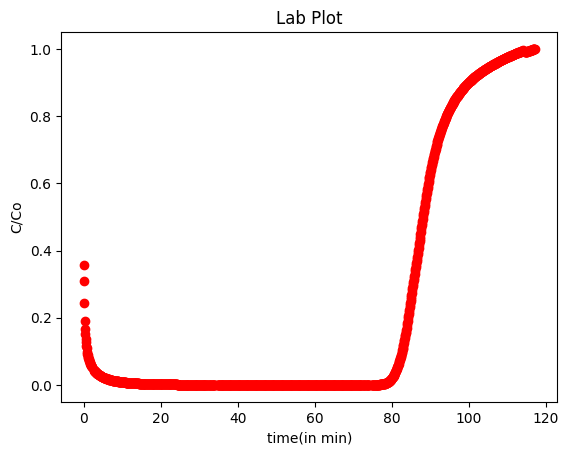

In [ ]:
plt.scatter(X, Y, color = 'red')
plt.title('Lab Plot')
plt.ylabel('C/Co')
plt.xlabel('time(in min)')
plt.show()

# Scatter data and the fitted curve

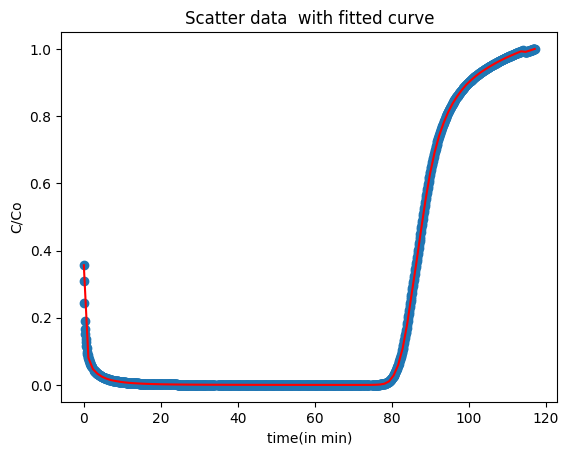

In [ ]:
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt


# fit a cubic spline to the data
spline = make_interp_spline(X, Y)

# evaluate the spline over a finer grid
Xfit = np.linspace(X.min(), X.max(), 100)
Yfit = spline(Xfit)

# plot the scatter data and the fitted curve
plt.scatter(X, Y)
plt.plot(Xfit, Yfit, color='red')

# add labels and title
plt.xlabel('time(in min)')
plt.ylabel('C/Co')
plt.title('Scatter data  with fitted curve')

plt.show()


In [ ]:
actual = np.array([])
iter = np.array([])
for i in range(len(Y)):
  if Y[i]<0.1:
    actual = np.append(actual,float(Y[i]))
    iter = np.append(iter,int(i))
print(len(actual))
print(iter
    )

962
[ 10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.
  24.  25.  26.  27.  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.
  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.
  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.
  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.
  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.
  94.  95.  96.  97.  98.  99. 100. 101. 102. 103. 104. 105. 106. 107.
 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118. 119. 120. 121.
 122. 123. 124. 125. 126. 127. 128. 129. 130. 131. 132. 133. 134. 135.
 136. 137. 138. 139. 140. 141. 142. 143. 144. 145. 146. 147. 148. 149.
 150. 151. 152. 153. 154. 155. 156. 157. 158. 159. 160. 161. 162. 163.
 164. 165. 166. 167. 168. 169. 170. 171. 172. 173. 174. 175. 176. 177.
 178. 179. 180. 181. 182. 183. 184. 185. 186. 187. 188. 189. 190. 191.
 192. 193. 194. 195. 196. 197. 198. 199. 200. 201. 202. 203. 204. 205.
 2

# Adding noise to the data

# Noise data curve

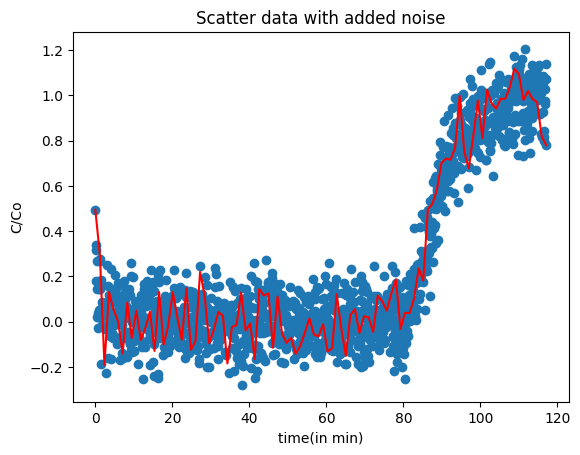

In [ ]:

# generate random noise and add it to the data
noise = np.random.normal(scale=0.1, size=len(X))
y_noisy = Y + noise


spline = make_interp_spline(X, y_noisy)

# evaluate the spline over a finer grid
xfit = np.linspace(X.min(), X.max(), 100)
yfit = spline(xfit)

# plot the noisy data
plt.scatter(X, y_noisy)
plt.plot(xfit,yfit,color = 'red')

# add labels and title
plt.xlabel('time(in min)')
plt.ylabel('C/Co')
plt.title('Scatter data with added noise')

plt.show()


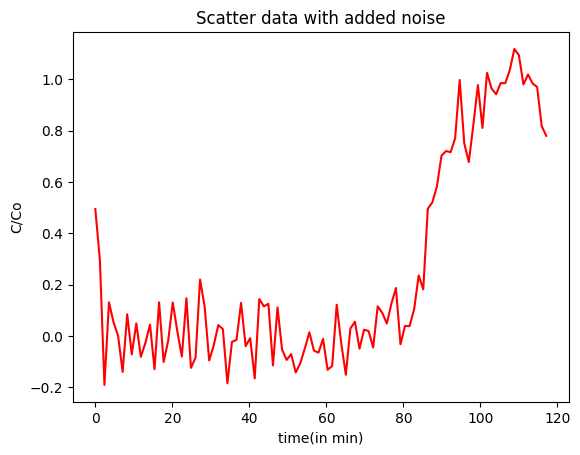

In [ ]:
plt.plot(xfit,yfit,color = 'red')

# add labels and title
plt.xlabel('time(in min)')
plt.ylabel('C/Co')
plt.title('Scatter data with added noise')
plt.show()


# Alarms after addition of noise

**Alarms for 10% threshold after adding noise**

In [ ]:
b_noisy = np.array([])
for i in range(len(actual)):
  if y_noisy[int(iter[i])]>0.1:
    b_noisy = np.append(b_noisy,float(y_noisy[int(iter[i])]))
print(len(b_noisy))

181


**Alarms for 2% threshold after adding noise**

In [ ]:
b_noisy2 = np.array([])
for i in range(len(actual)):
  if y_noisy[int(iter[i])]>0.02:

    b_noisy2 = np.append(b_noisy2,float(y_noisy[int(iter[i])]))
print(len(b_noisy2))

448


# Applying KalmanFilter

In [ ]:
!pip install pykalman

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pykalman: filename=pykalman-0.9.5-py3-none-any.whl size=48461 sha256=1ba3dc309d3a7285dcdf1314dbb8d37dc83ce34bc35b3c84775faab9c42ce9da
  Stored in directory: /root/.cache/pip/wheels/7a/68/21/675239322d2bb2e8e1fa317d4bd7b5566a4e82780b25a27f7a
Successfully built pykalman


In [ ]:
!pip install filterpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110473 sha256=f2189ebc28ed6f092993784453acb21d3e0b449c0898122efb7f30161538792e
  Stored in directory: /root/.cache/pip/wheels/53/e6/de/a09ea01e923aaf88b9f8c7c44329e857b2c1a31901167e55e6
Successfully built filterpy


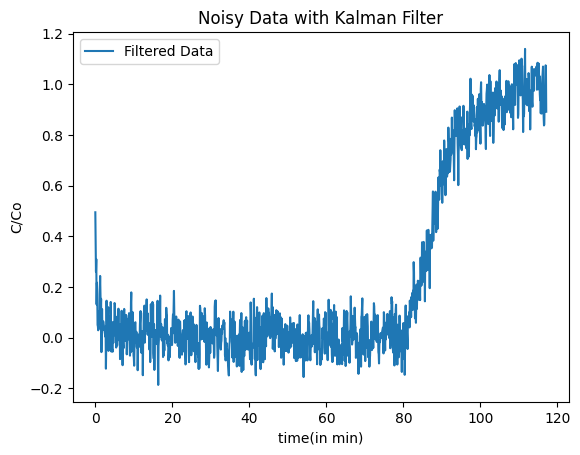

In [ ]:
from pykalman import KalmanFilter


# apply the Kalman filter
kf = KalmanFilter(initial_state_mean=y_noisy[0], n_dim_obs=1)
filtered_states, _ = kf.filter(y_noisy)

# plot the  filtered data
plt.plot(X, filtered_states, label='Filtered Data')

# add labels and title
plt.xlabel('time(in min)')
plt.ylabel('C/Co')
plt.title('Noisy Data with Kalman Filter')

plt.legend()
plt.show()



# Alarms after applying KalmanFilter

**Alarms for 10% threshold after applying Filter**

In [ ]:
b_filtered = np.array([])
for i in range(len(actual)):
  if filtered_states[int(iter[i])]>0.1:
    b_filtered = np.append(b_filtered,float(filtered_states[int(iter[i])]))
print(len(b_filtered))

97


# Percentage Alarm Reduction with KalmanFilter

**Percentage Reduction for 10% threshold**

In [ ]:
R = (len(b_noisy)-len(b_filtered))/len(b_noisy)*100
print(R)

50.0


# 2nd KalmanFilter

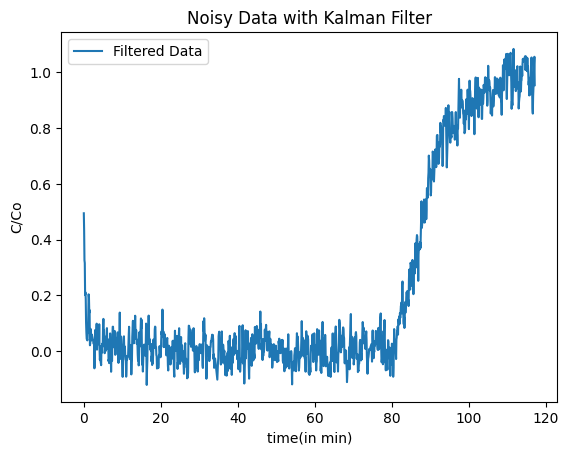

In [ ]:
# apply the Kalman filter for 2nd time
kf = KalmanFilter(initial_state_mean=filtered_states[0], n_dim_obs=1)
filtered_states_1, _ = kf.filter(filtered_states)

# plot the  filtered data
plt.plot(X, filtered_states_1, label='Filtered Data')

# add labels and title
plt.xlabel('time(in min)')
plt.ylabel('C/Co')
plt.title('Noisy Data with Kalman Filter')

plt.legend()
plt.show()

**Alarms for 10% threshold after applying Filter**

In [ ]:
b_filtered_cycle_1 = np.array([])
for i in range(len(actual)):
  if filtered_states_1[int(iter[i])]>0.1:
   b_filtered_cycle_1 = np.append(b_filtered_cycle_1,float(filtered_states_1[int(iter[i])]))
print(len(b_filtered_cycle_1))

36


# 3rd KalmanFilter


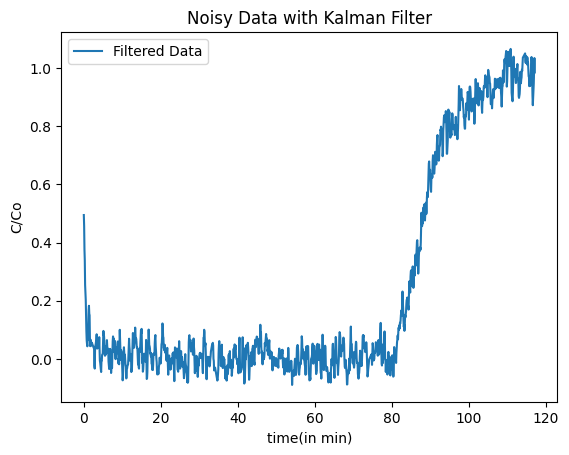

In [ ]:
# apply the Kalman filter for 3rd time
kf = KalmanFilter(initial_state_mean=filtered_states_1[0], n_dim_obs=1)
filtered_states_2, _ = kf.filter(filtered_states_1)

# plot the  filtered data
plt.plot(X, filtered_states_2, label='Filtered Data')

# add labels and title
plt.xlabel('time(in min)')
plt.ylabel('C/Co')
plt.title('Noisy Data with Kalman Filter')

plt.legend()
plt.show()

**Alarms for 10% threshold after applying Filter**

In [ ]:
b_filtered_cycle_2 = np.array([])
for i in range(len(actual)):
  if filtered_states_2[int(iter[i])]>0.1:
   b_filtered_cycle_2 = np.append(b_filtered_cycle_2,float(filtered_states_2[int(iter[i])]))
print(len(b_filtered_cycle_2))

22


# 4th KalmanFilter

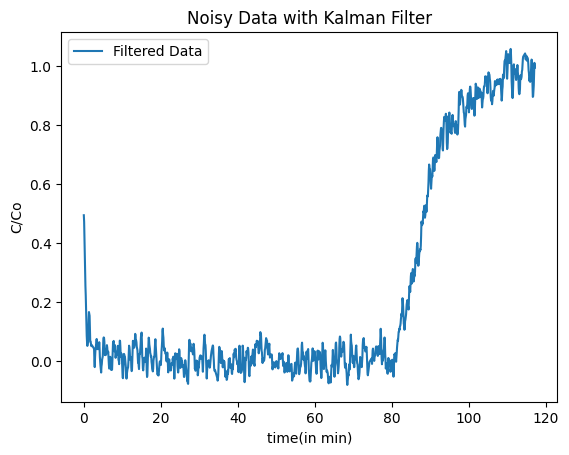

In [ ]:
# apply the Kalman filter for 4th time
kf = KalmanFilter(initial_state_mean=filtered_states_2[0], n_dim_obs=1)
filtered_states_3, _ = kf.filter(filtered_states_2)

# plot the  filtered data
plt.plot(X, filtered_states_3, label='Filtered Data')

# add labels and title
plt.xlabel('time(in min)')
plt.ylabel('C/Co')
plt.title('Noisy Data with Kalman Filter')

plt.legend()
plt.show()

**Alarms for 10% threshold after applying Filter**

In [ ]:
b_filtered_cycle_3 = np.array([])
for i in range(len(actual)):
  if filtered_states_3[int(iter[i])]>0.1:
   b_filtered_cycle_3 = np.append(b_filtered_cycle_3,float(filtered_states_3[int(iter[i])]))
print(len(b_filtered_cycle_3))

15


## 5th KalmanFilter

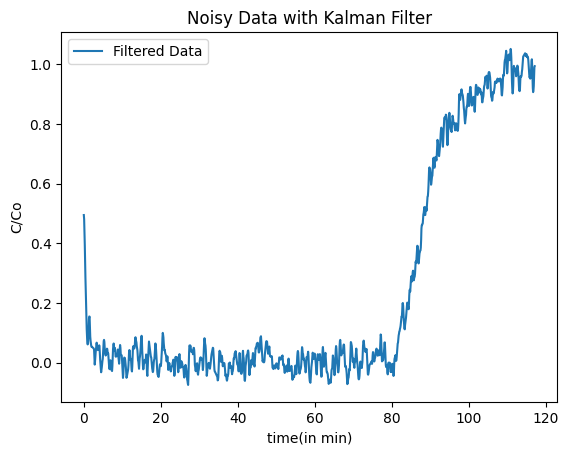

In [ ]:
# apply the Kalman filter for 5th time
kf = KalmanFilter(initial_state_mean=filtered_states_3[0], n_dim_obs=1)
filtered_states_4, _ = kf.filter(filtered_states_3)

# plot the  filtered data
plt.plot(X, filtered_states_4, label='Filtered Data')

# add labels and title
plt.xlabel('time(in min)')
plt.ylabel('C/Co')
plt.title('Noisy Data with Kalman Filter')

plt.legend()
plt.show()

**Alarms for 10% threshold after applying Filter**

In [ ]:
b_filtered_cycle_4 = np.array([])
for i in range(len(actual)):
  if filtered_states_4[int(iter[i])]>0.1:
   b_filtered_cycle_4 = np.append(b_filtered_cycle_4,float(filtered_states_4[int(iter[i])]))
print(len(b_filtered_cycle_4))

11


# 6th KalmanFilter

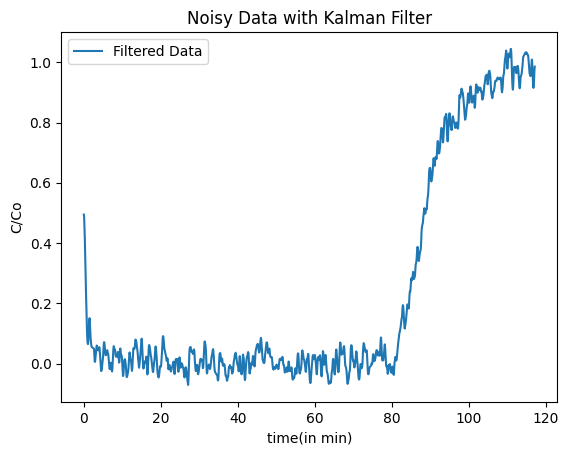

In [ ]:
# apply the Kalman filter for 6th time
kf = KalmanFilter(initial_state_mean=filtered_states_4[0], n_dim_obs=1)
filtered_states_5, _ = kf.filter(filtered_states_4)

# plot the  filtered data
plt.plot(X, filtered_states_5, label='Filtered Data')

# add labels and title
plt.xlabel('time(in min)')
plt.ylabel('C/Co')
plt.title('Noisy Data with Kalman Filter')

plt.legend()
plt.show()

**Alarms for 10% threshold after applying Filter**

In [ ]:
b_filtered_cycle_5 = np.array([])
for i in range(len(actual)):
  if filtered_states_5[int(iter[i])]>0.1:
   b_filtered_cycle_5 = np.append(b_filtered_cycle_5,float(filtered_states_5[int(iter[i])]))
print(len(b_filtered_cycle_5))

7


# 7th KalmanFilter

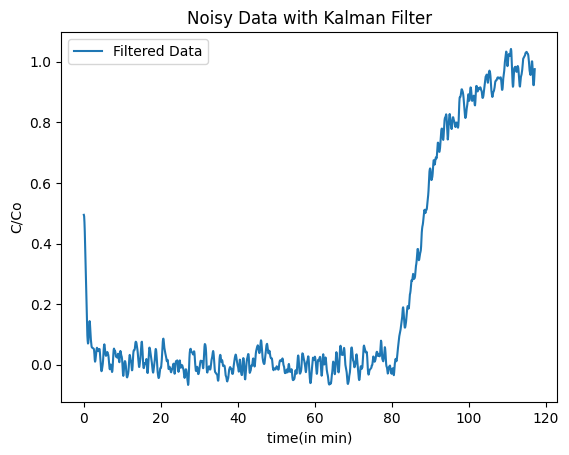

In [ ]:
# apply the Kalman filter for 7th time

kf = KalmanFilter(initial_state_mean=filtered_states_5[0], n_dim_obs=1)
filtered_states_6, _ = kf.filter(filtered_states_5)

# plot the  filtered data
plt.plot(X, filtered_states_6, label='Filtered Data')

# add labels and title
plt.xlabel('time(in min)')
plt.ylabel('C/Co')
plt.title('Noisy Data with Kalman Filter')

plt.legend()
plt.show()

**Alarms for 10% threshold after applying Filter**

In [ ]:
b_filtered_cycle_6 = np.array([])
for i in range(len(actual)):
  if filtered_states_6[int(iter[i])]>0.1:
   b_filtered_cycle_6 = np.append(b_filtered_cycle_6,float(filtered_states_6[int(iter[i])]))
print(len(b_filtered_cycle_6))

6


# 8th KalmanFilter

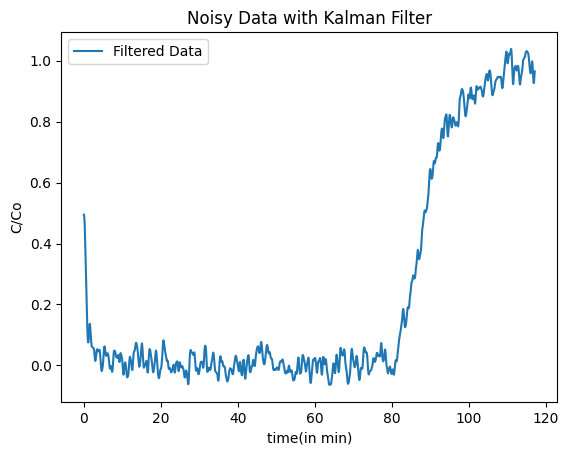

In [ ]:
# apply the Kalman filter for 8th time
kf = KalmanFilter(initial_state_mean=filtered_states_6[0], n_dim_obs=1)
filtered_states_7, _ = kf.filter(filtered_states_6)

# plot the  filtered data
plt.plot(X, filtered_states_7, label='Filtered Data')

# add labels and title
plt.xlabel('time(in min)')
plt.ylabel('C/Co')
plt.title('Noisy Data with Kalman Filter')

plt.legend()
plt.show()

**Alarms for 10% threshold after applying Filter**

In [ ]:
b_filtered_cycle_7 = np.array([])
for i in range(len(actual)):
  if filtered_states_7[int(iter[i])]>0.1:
   b_filtered_cycle_7 = np.append(b_filtered_cycle_7,float(filtered_states_7[int(iter[i])]))
print(len(b_filtered_cycle_7))

6


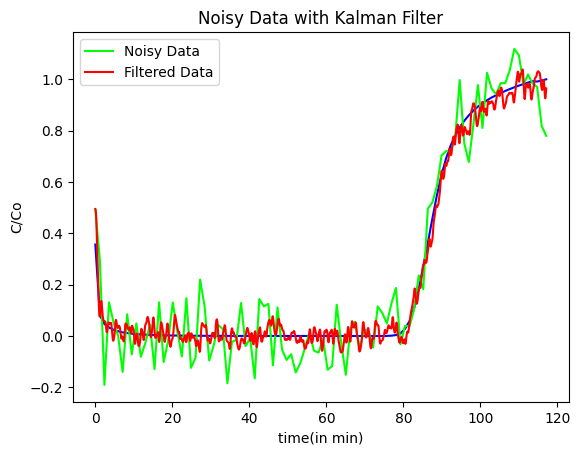

In [ ]:
# apply the Kalman filter for 8th time
kf = KalmanFilter(initial_state_mean=filtered_states_6[0], n_dim_obs=1)
filtered_states_7, _ = kf.filter(filtered_states_6)

# plot the  filtered data
plt.plot(Xfit, Yfit, color='blue')
plt.plot(xfit,yfit,color = 'lime', label= "Noisy Data")
plt.plot(X, filtered_states_7,color= 'red', label='Filtered Data')

# add labels and title
plt.xlabel('time(in min)')
plt.ylabel('C/Co')
plt.title('Noisy Data with Kalman Filter')

plt.legend()
plt.show()

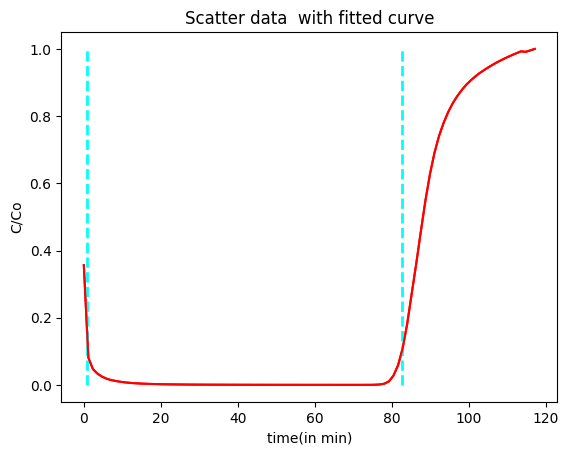

In [ ]:
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt


# fit a cubic spline to the data
spline = make_interp_spline(X, Y)

# evaluate the spline over a finer grid
xfit = np.linspace(X.min(), X.max(), 100)
yfit = spline(xfit)

# plot the scatter data and the fitted curve
plt.plot(xfit, yfit, color='red')
plt.vlines(x=[X[(int(iter[0]))],X[(int(iter[961]))]],ymin = 0,ymax = 1, colors='aqua', ls='--', lw=2, label='vline_multiple - full height')
plt.plot(xfit, yfit, color='red')

# add labels and title
plt.xlabel('time(in min)')
plt.ylabel('C/Co')
plt.title('Scatter data  with fitted curve')

plt.show()


In [ ]:
print(X[int(iter[0])])

0.833333333


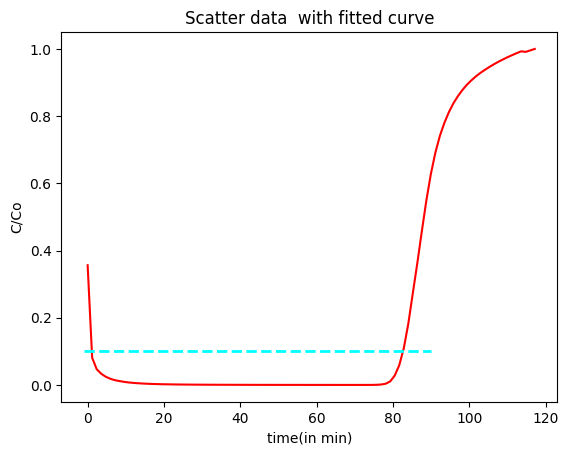

In [ ]:
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt


# fit a cubic spline to the data
spline = make_interp_spline(X, Y)

# evaluate the spline over a finer grid
xfit = np.linspace(X.min(), X.max(), 100)
yfit = spline(xfit)

# plot the scatter data and the fitted curve

plt.plot(xfit, yfit, color='red')
plt.hlines(y=[0.1], xmin=[-1], xmax=[90], colors='aqua', linestyles='--', lw=2, label = "10% threshold")

# add labels and title
plt.xlabel('time(in min)')
plt.ylabel('C/Co')
plt.title('Scatter data  with fitted curve')

plt.show()

